## Selection of target in image
This notebook allows the user to select a target in the image specified.

This code is part of the gather training data notebook. Here all other features have been removed which allows us to look only at the selection part of the code.

This is good to get used to how the selector works without having to wait for the whole training data pipeline to compute.


This first section is only loading requiered libraries. But it also specifies the path to the image you want to select from.

The target selection uses matplotlib widgets to make the plots interactive and allows to user to click in the images. It also uses a library called jupyter_ui_poll in order for the notebook to wait for user input. 

In [1]:
base_image = 'PATH_TO_IMAGE_WITH_TARGET'

%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import ipywidgets as widgets
import time




from matplotlib.widgets import Button
from IPython.display import display, clear_output
from jupyter_ui_poll import ui_events


Here we define the continue and reset buttons but also what should happen when the image is clicked. In our case we want to regiser the coordinates and also plot a point in the image for the user to see. The color is shifted every 4 points. This gives every target a different color.

In [2]:
# Define function to handle mouse click event
def onclick(event):
    global color
    if event.inaxes == ax:
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y))
        HSV_color = (color, 1.0, 1.0)  # Color in HSV, (hue, saturation, value) all between 0 and 1
        RGB_color = mcolors.hsv_to_rgb(HSV_color)
        ax.plot(x, y, 'o', color = RGB_color)  # Plot a dot at the clicked position
        fig.canvas.draw()

# Define function to handle button click event
def on_continue_button_clicked(b):
    time.sleep(0.1)
    plt.close()
    global waiting
    waiting = False

def on_reset_button_clicked(b):
    global clicked_points
    clicked_points = []
    ax.clear()
    ax.imshow(image)
    input_widget.value = ''
    fig.canvas.draw()

This section is the main part of the notebook. It plots the image and also polls for user input for the click event. When four corners are selected that is one target and it is added to the list of targets. When done with selecting target(s), press continue. Press reset to start over the selection process (note, this removes all current targets).

Label(value='Please select the four corners of your target by clicking on them in any order.')

Button(description='Continue', style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

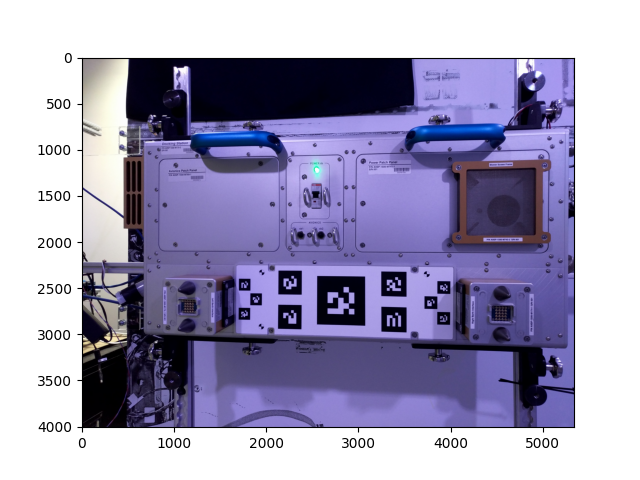

In [3]:
waiting = True

# Load your image
image = plt.imread(base_image)

color = 0

point_list = []

# Initialize list to store clicked coordinates
clicked_points = []

# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(image)

# Connect the onclick function to the mouse click event
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Create a widgets
prompt_label = widgets.Label(value = 'Please select the four corners of your target by clicking on them in any order.')
#continue_button = widgets.Button(description = 'Continue')
reset_button = widgets.Button(description = 'Reset')
continue_button = widgets.Button(description = 'Continue')


display(prompt_label)
display(continue_button)
display(reset_button)
plt.show()


# Attach button click event handlers
reset_button.on_click(on_reset_button_clicked)
continue_button.on_click(on_continue_button_clicked)
with ui_events() as poll:
    while waiting == True:
        if len(clicked_points) == 4:
            color = (color + 0.1) % 1
            point_list.append(clicked_points)
            clicked_points = []
        
            
        #waiting for user input
        poll(10) # poll queued UI events including button
        pass

In [4]:
print('This is a list of all the selected targets: ' + str(point_list))

This is a list of all the selected targets: [[(2266, 1135), (2808, 1102), (2222, 1785), (2840, 1807)]]
